In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.close("all")


# Basic plotting: plot

In [5]:
df = pd.DataFrame(np.random.randn(1000,4),
                 columns=list('ABCD'))

<Axes: >

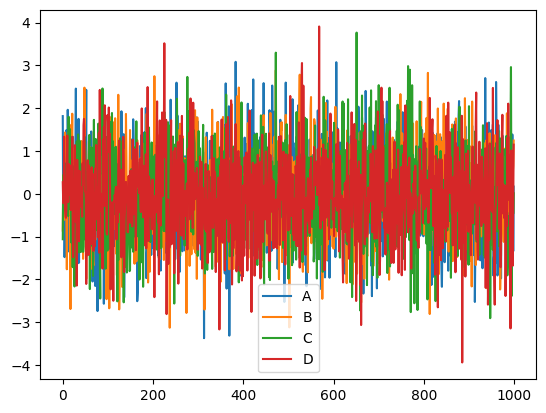

In [6]:
df.plot()

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

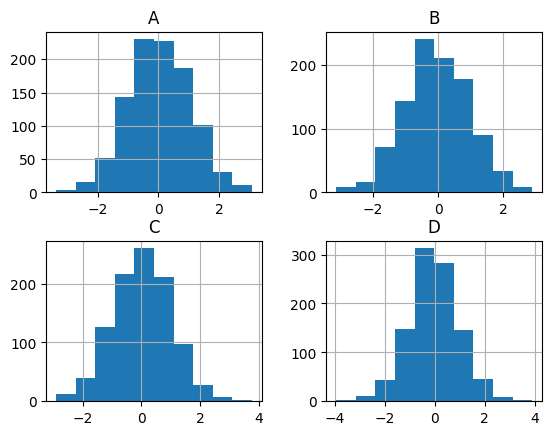

In [7]:
df.hist()

In [8]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

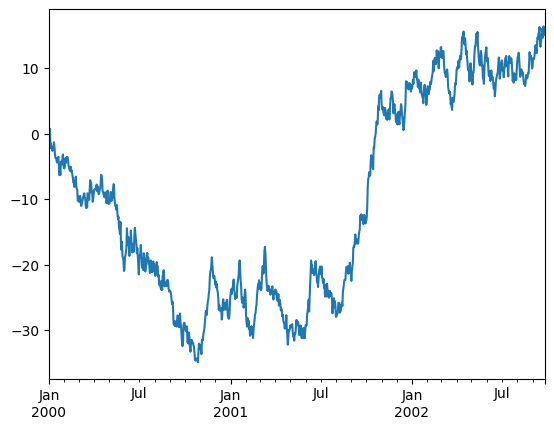

In [9]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 640x480 with 0 Axes>

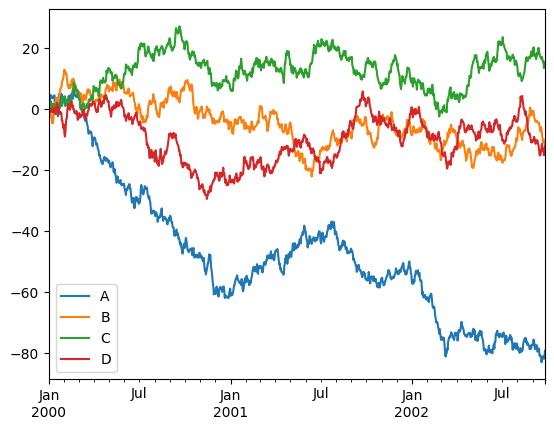

In [10]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

plt.figure();

df.plot();

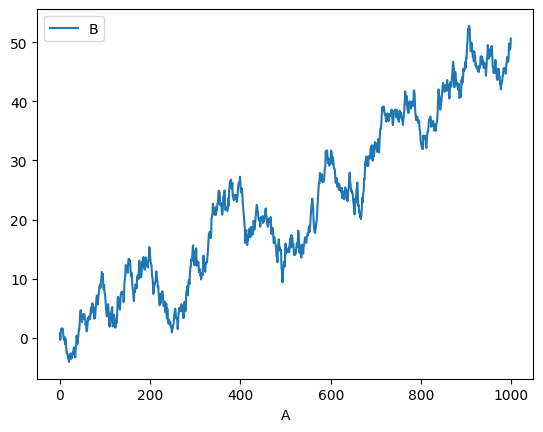

In [11]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B");

# Other plots

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots

- ‘hist’ for histogram

- ‘box’ for boxplot

- ‘kde’ or ‘density’ for density plots

- ‘area’ for area plots

- ‘scatter’ for scatter plots

- ‘hexbin’ for hexagonal bin plots

- ‘pie’ for pie plots



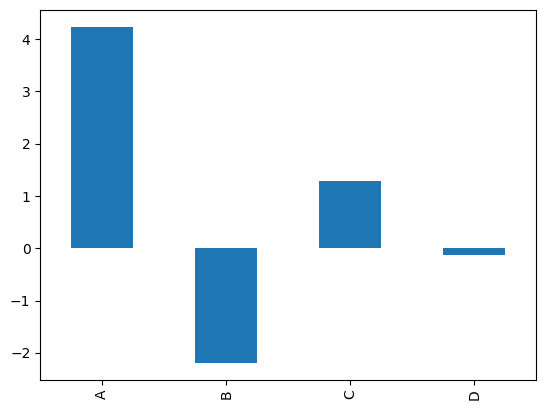

In [12]:
plt.figure();

df.iloc[5].plot(kind="bar");

Finally, there are several plotting functions in pandas.plotting that take a Series or DataFrame as an argument. These include:

- Scatter Matrix

- Andrews Curves

- Parallel Coordinates

- Lag Plot

- Autocorrelation Plot

- Bootstrap Plot

- RadViz

In [14]:
df = pd.DataFrame()

df.plot.<TAB> 

SyntaxError: invalid syntax (2638501028.py, line 3)

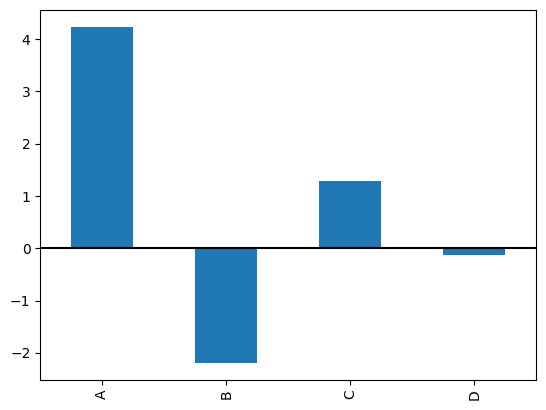

In [15]:
plt.figure();

df.iloc[5].plot.bar();

plt.axhline(0, color="k");

In [19]:
df

,A,B,C,D
2000-01-01,1.160525,-0.631042,0.350996,-0.710905
2000-01-02,1.702043,-1.253631,1.001803,-0.717988
2000-01-03,2.933009,-2.087175,0.336078,-1.370244
2000-01-04,3.845330,-2.569147,-0.371052,-0.748921
2000-01-05,4.446712,-1.926165,2.417659,-0.324485
...,...,...,...,...
2002-09-22,-81.912792,-11.040000,15.155315,-13.936787
2002-09-23,-81.749617,-10.175168,15.505027,-13.217942
2002-09-24,-80.931476,-10.276031,13.286600,-15.269811
2002-09-25,-81.877130,-11.396013,13.916837,-13.136346


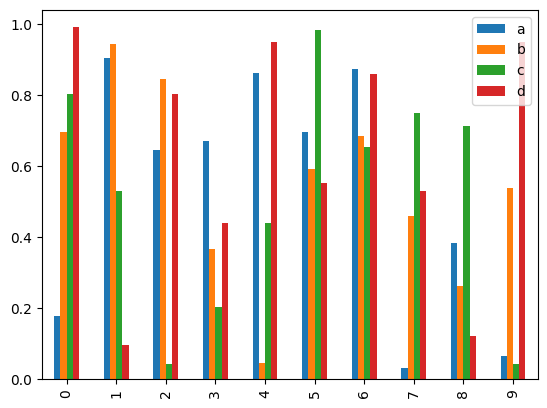

In [16]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar();

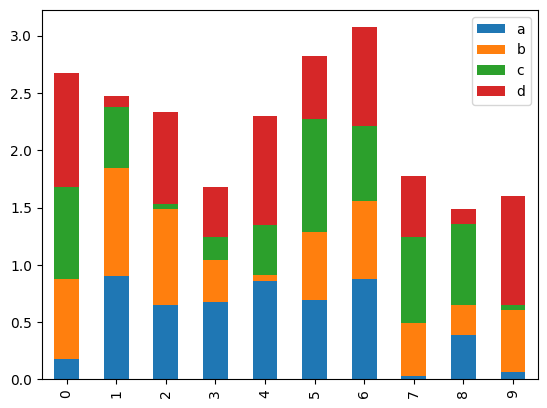

In [17]:
df2.plot.bar(stacked=True);


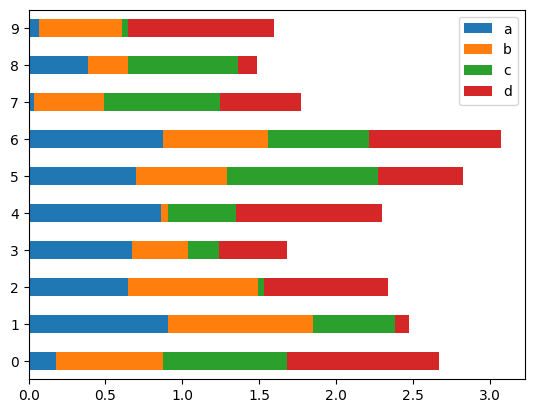

In [18]:
df2.plot.barh(stacked=True);


## Histograms

<Figure size 640x480 with 0 Axes>

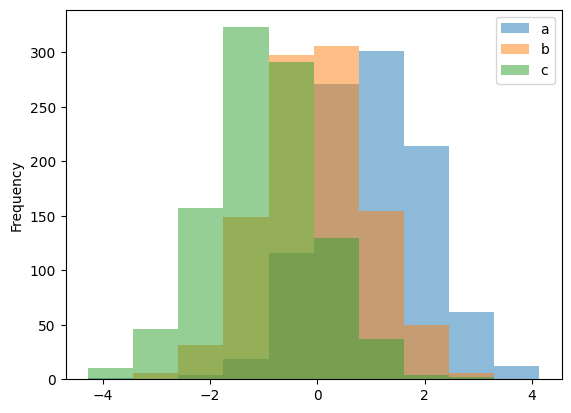

In [21]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)


plt.figure();

df4.plot.hist(alpha=0.5);

<Figure size 640x480 with 0 Axes>

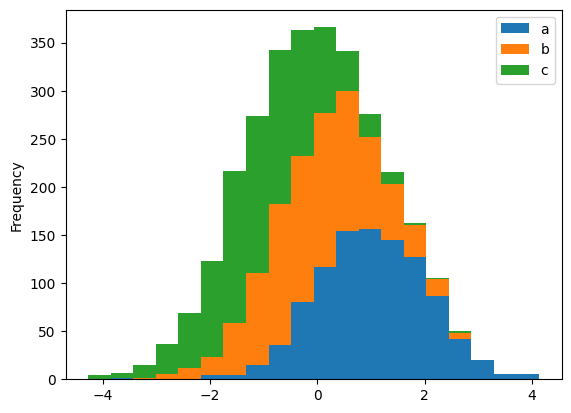

In [22]:
plt.figure();

df4.plot.hist(stacked=True, bins=20);

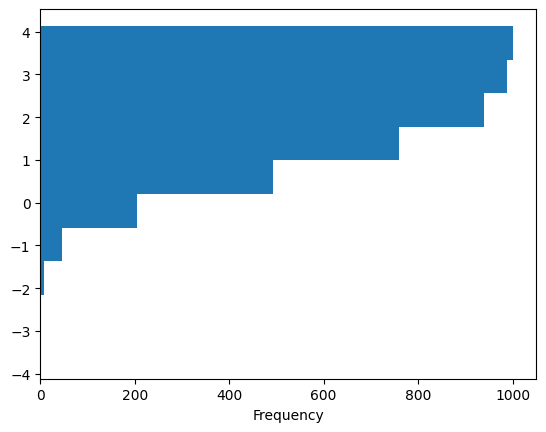

In [23]:
plt.figure();

df4["a"].plot.hist(orientation="horizontal", cumulative=True);

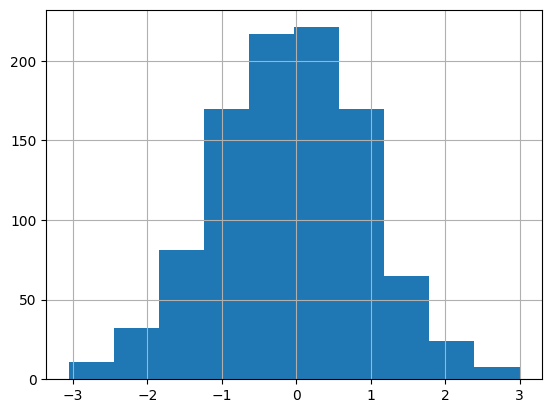

In [24]:
plt.figure();

df["A"].diff().hist();

In [25]:
df.A.diff()

2000-01-01         NaN
2000-01-02    0.541517
2000-01-03    1.230967
2000-01-04    0.912321
2000-01-05    0.601382
                ...   
2002-09-22   -0.710948
2002-09-23    0.163175
2002-09-24    0.818141
2002-09-25   -0.945654
2002-09-26    2.563472
Freq: D, Name: A, Length: 1000, dtype: float64

<Figure size 640x480 with 0 Axes>

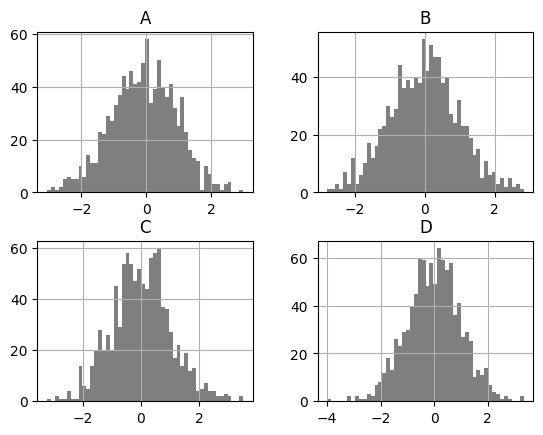

In [26]:
plt.figure();

df.diff().hist(color="k", alpha=0.5, bins=50);

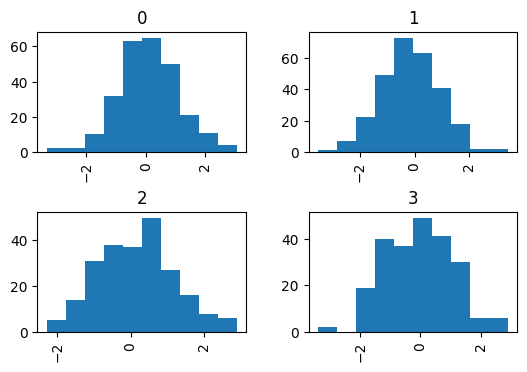

In [27]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4));

In [28]:
data = pd.DataFrame(
    {
        "a": np.random.choice(["x", "y", "z"], 1000),
        "b": np.random.choice(["e", "f", "g"], 1000),
        "c": np.random.randn(1000),
        "d": np.random.randn(1000) - 1,
    },
)

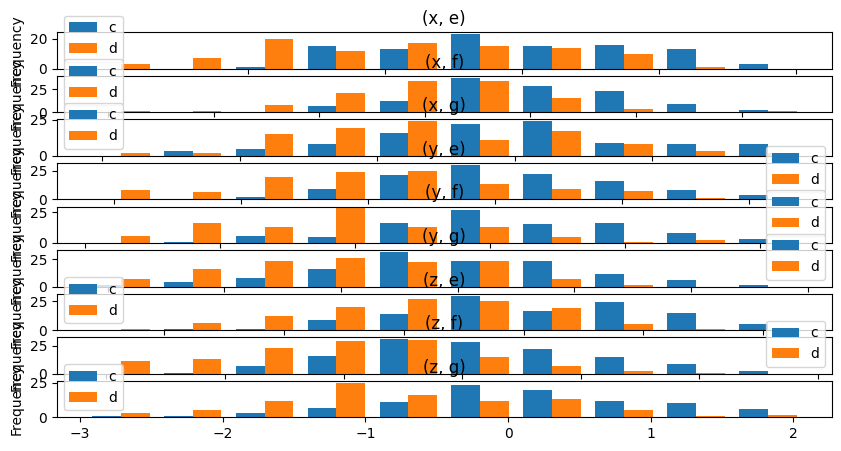

In [29]:
data.plot.hist(by=["a", "b"], figsize=(10, 5));


## Box plots

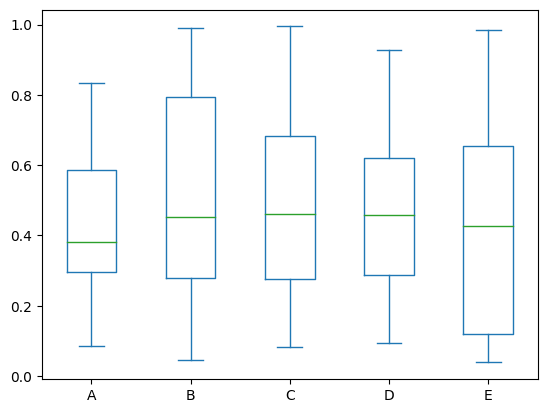

In [30]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df.plot.box();

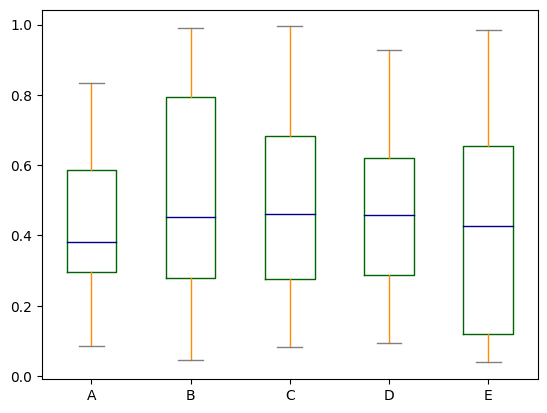

In [31]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}


df.plot.box(color=color, sym="r+");

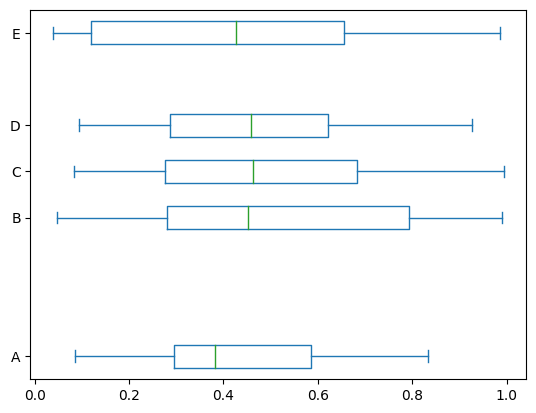

In [32]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);


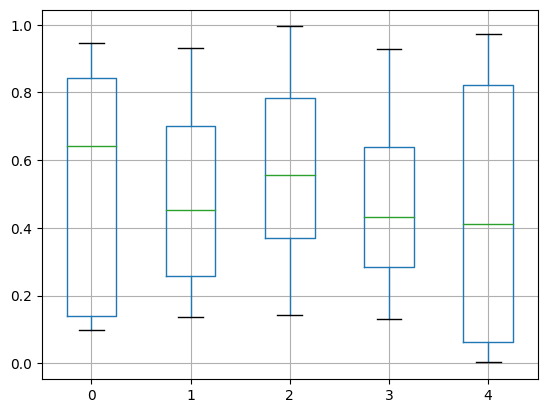

In [33]:
df = pd.DataFrame(np.random.rand(10, 5))

plt.figure();

bp = df.boxplot()

<Figure size 640x480 with 0 Axes>

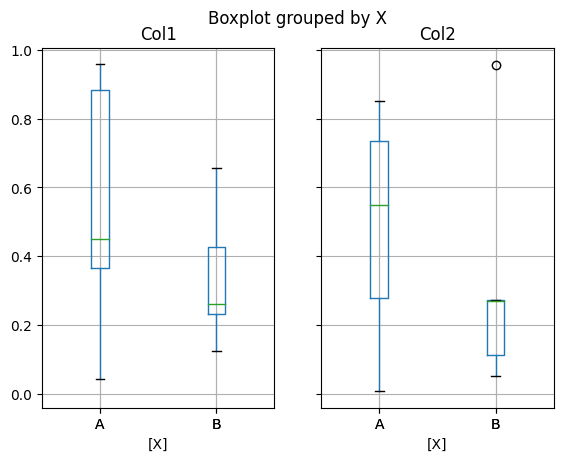

In [34]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

plt.figure();

bp = df.boxplot(by="X")

<Figure size 640x480 with 0 Axes>

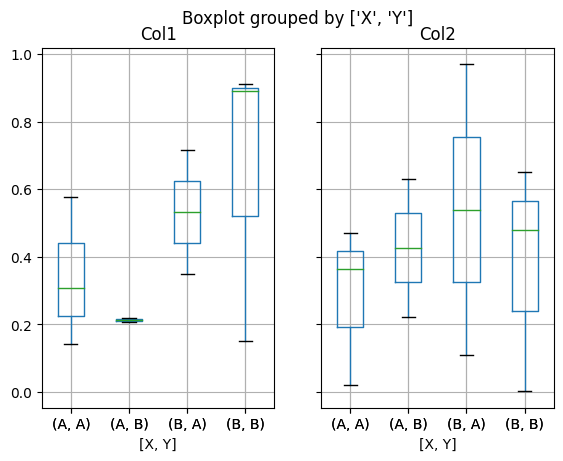

In [35]:
df = pd.DataFrame(np.random.rand(10, 3), columns=["Col1", "Col2", "Col3"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

df["Y"] = pd.Series(["A", "B", "A", "B", "A", "B", "A", "B", "A", "B"])

plt.figure();

bp = df.boxplot(column=["Col1", "Col2"], by=["X", "Y"])

<Figure size 640x480 with 0 Axes>

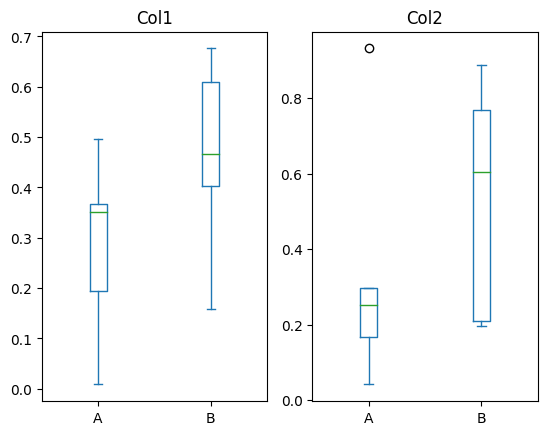

In [36]:
df = pd.DataFrame(np.random.rand(10, 3), columns=["Col1", "Col2", "Col3"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

plt.figure();

bp = df.plot.box(column=["Col1", "Col2"], by="X")

## Area plot

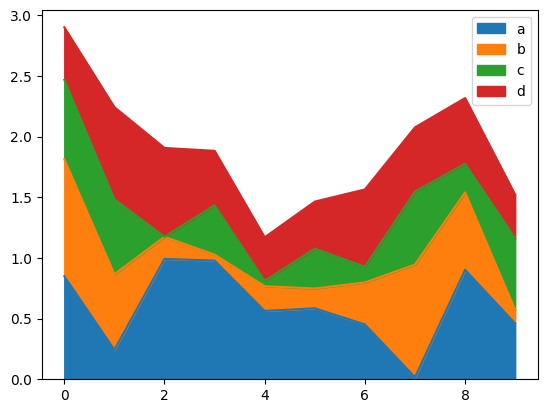

In [39]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df.plot.area();

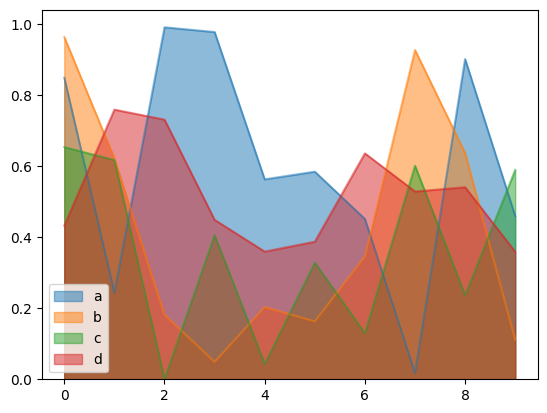

In [40]:
df.plot.area(stacked=False);


## Scatter plot

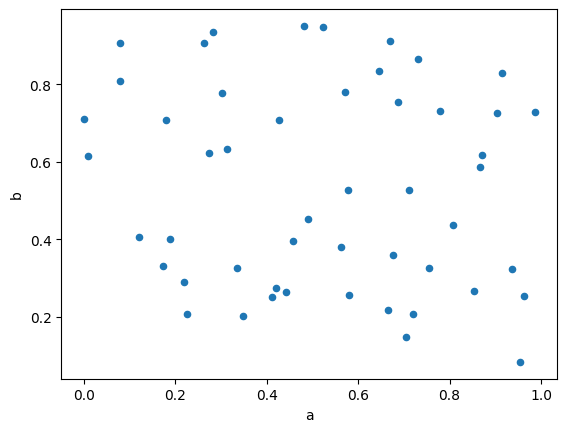

In [41]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)


df.plot.scatter(x="a", y="b");

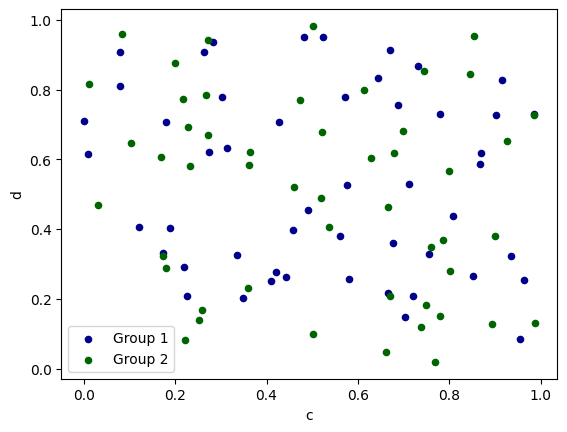

In [42]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")

df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

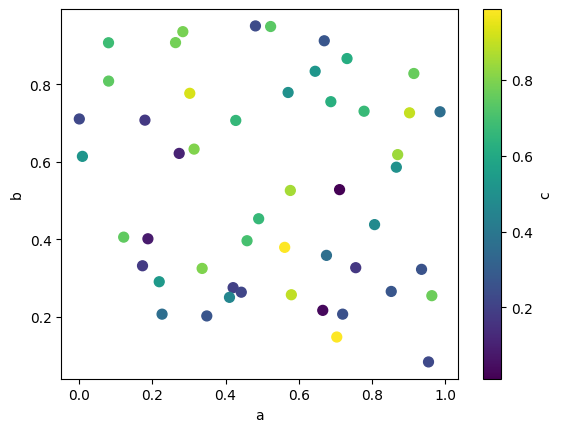

In [43]:
df.plot.scatter(x="a", y="b", c="c", s=50);


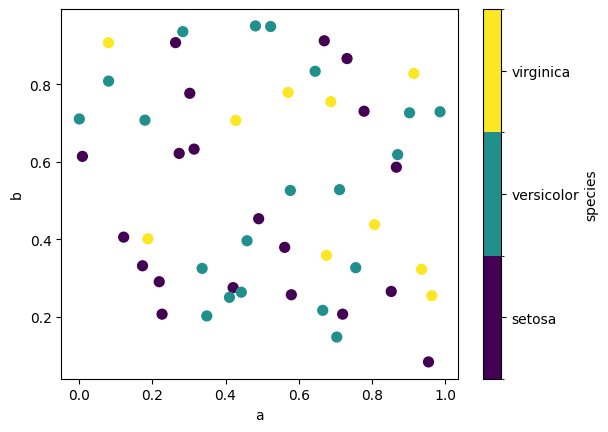

In [44]:
df.plot.scatter(x="a", y="b", c="species", cmap="viridis", s=50);


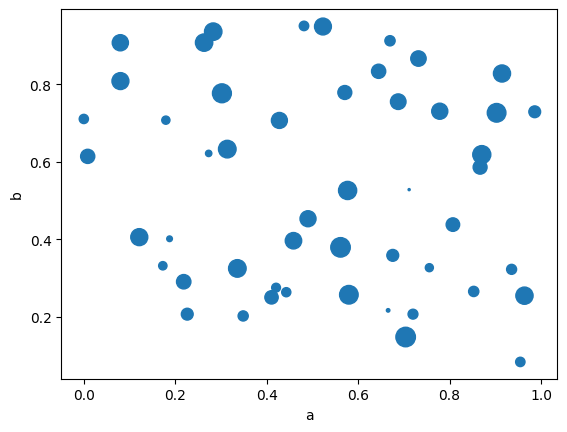

In [45]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200);


# Hexagonal bin plot

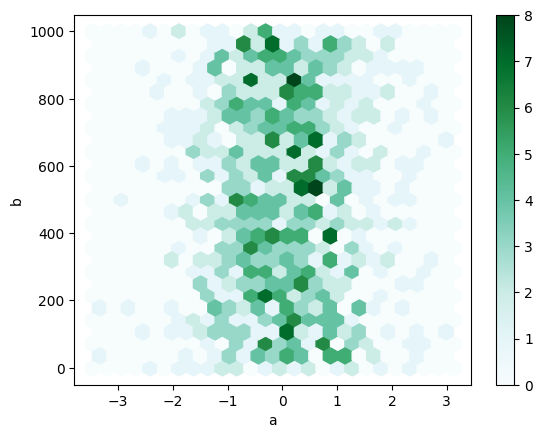

In [46]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

df.plot.hexbin(x="a", y="b", gridsize=25);

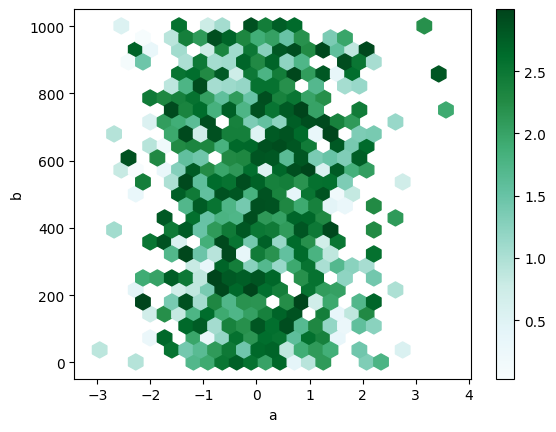

In [47]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

df["z"] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25);


## Pie plot

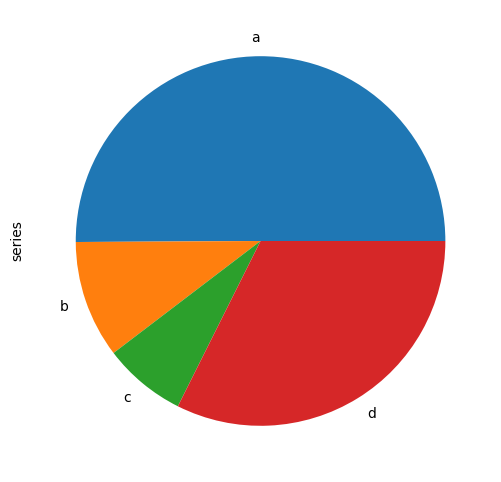

In [48]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6));

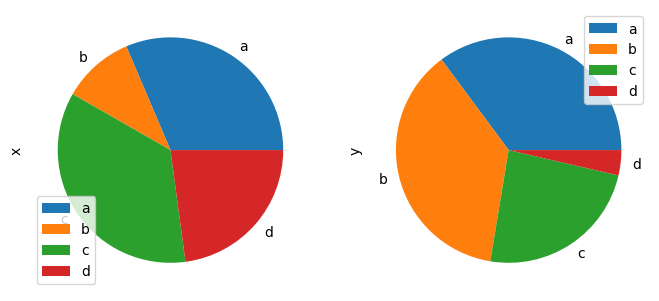

In [49]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)


df.plot.pie(subplots=True, figsize=(8, 4));

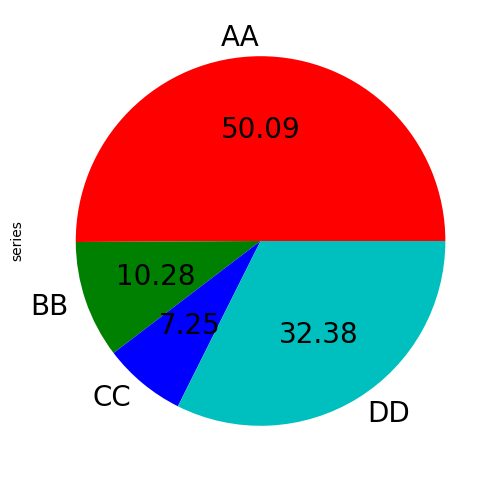

In [50]:
series.plot.pie(
    labels=["AA", "BB", "CC", "DD"],
    colors=["r", "g", "b", "c"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
);